In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import models, layers
from tensorflow.keras.callbacks import EarlyStopping 

In [ ]:
data = pd.DataFrame(np.random.rand(1000,14), columns= [f"feature_{i}" for i in range(1,15)])


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14
0,0.761897,0.330426,0.393359,0.053166,0.894122,0.947386,0.651515,0.127254,0.143031,0.027735,0.972864,0.444128,0.865238,0.541711
1,0.803440,0.082322,0.824462,0.459133,0.269237,0.644647,0.526504,0.546193,0.177117,0.340762,0.422293,0.705941,0.836442,0.284382
2,0.427959,0.489702,0.147672,0.435343,0.598216,0.543286,0.576108,0.167791,0.422039,0.259850,0.232108,0.018483,0.860466,0.992977
3,0.080821,0.378291,0.059336,0.663805,0.152281,0.483777,0.020046,0.811351,0.522842,0.196006,0.321694,0.568138,0.871773,0.386159
4,0.804408,0.202581,0.668848,0.338729,0.421445,0.109683,0.424515,0.793742,0.722849,0.568282,0.091020,0.272463,0.581073,0.542603


In [16]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [21]:
def create_sequence(data, steps):
    x,y = [],[]
    for i in range(len(data)-steps):
        Xs = data[i:i+steps]
        ys = data[i+steps]
        x.append(Xs)
        y.append(ys)
    return np.array(x), np.array(y)


In [22]:
X, y = create_sequence(data, 14)

In [23]:
split = int(len(data)*0.8)
X_train, y_train = X[:split], y[:split]
X_test, y_test = X[split:], y[split:] 

In [24]:
model = models.Sequential(
    [
        layers.GRU(64, input_shape = (14, 14)),
        layers.Dense(14)
    ]
)

c:\Users\junai\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
Early_stop = EarlyStopping(
    monitor="val_loss",
    patience = 3
      )

In [26]:
model.compile(optimizer = "adam", loss = "mae", metrics = ["mae"])

In [31]:
history = model.fit(
    X_train, y_train, epochs = 20, batch_size = 32, validation_split = 0.2
)

print(history.history)

Epoch 1/20


20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2465 - mae: 0.2465 - val_loss: 0.2562 - val_mae: 0.2562
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2468 - mae: 0.2468 - val_loss: 0.2564 - val_mae: 0.2564
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2468 - mae: 0.2468 - val_loss: 0.2545 - val_mae: 0.2545
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2479 - mae: 0.2479 - val_loss: 0.2566 - val_mae: 0.2566
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2487 - mae: 0.2487 - val_loss: 0.2564 - val_mae: 0.2564
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2462 - mae: 0.2462 - val_loss: 0.2545 - val_mae: 0.2545
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.2454 - mae: 0.2454 - val_loss: 0.2554 - val_mae: 0.2554
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.2464 - mae: 0.2464 - val_loss: 0.2555 - val_mae: 0.2555
Epoch 9/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.2432 - mae: 0.

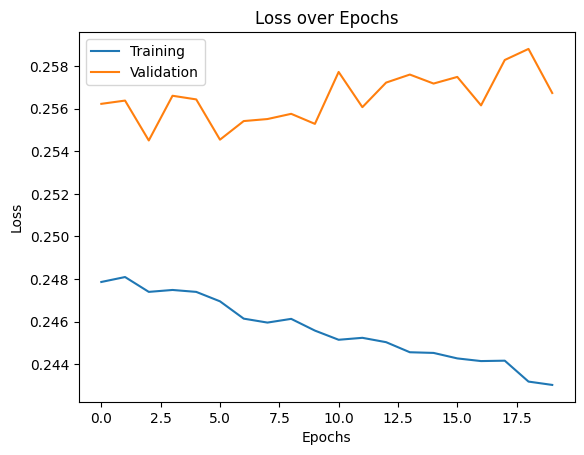

In [32]:
import matplotlib.pyplot as plt

plt.plot(history.history["loss"], label = "Training")
plt.plot(history.history["val_loss"], label = "Validation")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss over Epochs")
plt.legend()
plt.show()